In [1]:
import os, sys
dir1 = os.path.abspath('..\..')
sys.path.append(dir1+ "\\")

import MetaTrader5 as mt
from datetime import datetime as dt

# custom
from my_jupyter.user import User
from my_jupyter.strategy_manager import StrategyManager
from my_jupyter.operation import Operation
from my_jupyter.strategies.min_max_strategy import MinMaxStrategy
from my_jupyter.market_data_repository import MarketDataRepository
# from Mbox import Mbox
# from boleta_1 import gerar_boleta
# from gerenciamento import Gerenciamento

## GUI's
from daemon_tools import DaemonThreadMini


In [2]:
strategies = [MinMaxStrategy()]
operation = Operation("WINV23", 1, mt.TIMEFRAME_M1, True, True)
user = User(strategies=strategies,operations=[operation], trading_time_start=dt.now())
market_data_repository = MarketDataRepository()
strategy = StrategyManager(market_data_repository, user)

# PARAMETROS MAIN
kwargs = {
    'strategy': strategy,
}

def main(**kwargs):
    _shift= 0 
    strategy: StrategyManager = kwargs['strategy']
    strategy.run_strategies()
    # print(f"{dt.now().strftime('%d/%m/%Y, %H:%M:%S')} >>> D-{_shift}")

In [3]:
def exec_daemon(**kwargs):
    main(**kwargs)
    # alarme.ring_alarme()   

In [4]:
# alarme = Alarme()
# alarme.set_alarme(True)
# alarme.filtrar_flag(sinais_abertura_daemon)
# alarme.filtrar_papeis(papeis_ibov_elevado )
# gerenciamento = Gerenciamento(mt, timeframe, timeframes_dict)

try:
    main(**kwargs)
except Exception as e:
    print(e.with_traceback(__tb=None))
    # Mbox.Alerta("ERRO", "busca de sinais com erro")


selling
1. order_send(): by WINV23 1.0 lots at 120255.0 with deviation=2 points
OrderSendResult(retcode=10009, deal=1208977969, order=1635081603, volume=1.0, price=120255.0, bid=120255.0, ask=120260.0, comment='Request executed', request_id=1346389416, retcode_external=0, request=TradeRequest(action=1, magic=1618, order=0, symbol='WINV23', volume=1.0, price=120255.0, stoplimit=0.0, sl=0.0, tp=0.0, deviation=10, type=1, type_filling=0, type_time=0, expiration=0, comment='WINV23 1', position=0, position_by=0))


In [5]:
from my_jupyter.daemons.daemon_tools import DaemonThreadMini


thread_exec = DaemonThreadMini(exec_daemon, seconds=0, mseconds=100, **kwargs)
thread_exec.start()

selling
1. order_send(): by WINV23 1.0 lots at 120260.0 with deviation=2 points
OrderSendResult(retcode=10009, deal=1208977971, order=1635081605, volume=1.0, price=120255.0, bid=120255.0, ask=120260.0, comment='Request executed', request_id=1346389417, retcode_external=0, request=TradeRequest(action=1, magic=1618, order=0, symbol='WINV23', volume=1.0, price=120260.0, stoplimit=0.0, sl=0.0, tp=0.0, deviation=10, type=1, type_filling=0, type_time=0, expiration=0, comment='WINV23 1', position=0, position_by=0))


KeyboardInterrupt: 

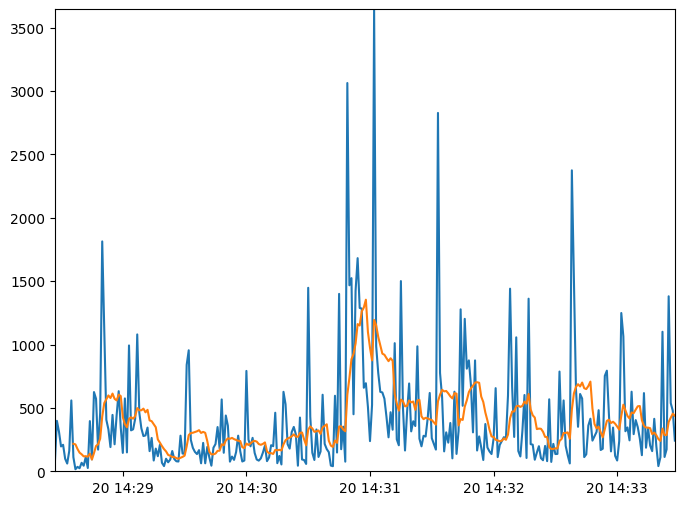

In [54]:
from datetime import timedelta as td, datetime as dt
import pandas as pd
import numpy as np
import threading
import time
from matplotlib import pyplot as plt
from my_jupyter.metatrader_wrapper import MetatraderWrapper
from IPython.display import display, clear_output

mt = MetatraderWrapper()
mt.demo_on()

td_ = td(hours=3, minutes=5)
now = dt.now()
nexti = dt(now.year, now.month, now.day, now.hour, now.minute, now.second) - td_
# print(nexti)
# ticks = market_data_repository.mt.copy_ticks_from("WINV23", nexti,100, mt.TICK_FLAG_VOLUME)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# line1, = ax.plot([], [], 'r-') # Returns a tuple of line objects, thus the comma
# Enable interactive mode for Matplotlib
plt.ion()

# Create initial empty plot
fig, ax = plt.subplots()
(line,) = ax.plot([], [])
(avg_,) = ax.plot([], [])
ax.set_ylim(0, 10)
ax.set_xlim(0, 2*60+1)
fig.set_figheight(6)
fig.set_figwidth(8)

y_max = -1
# plt.show()
while True:
    now = dt.now()
    nexti = now - td_
    ticks = mt.mt.copy_ticks_range("WINV23", nexti, now, mt.mt.COPY_TICKS_ALL)

    ticks_frame = pd.DataFrame(ticks)

    # ticks_frame["time"] = pd.to_datetime(ticks_frame["time_msc"]/1000, unit="s")
    ticks_frame["time"] = round(ticks_frame["time_msc"] / 1000)
    ticks_frame["time_dt"] = pd.to_datetime(round(ticks_frame["time_msc"]/1000), unit="s")

    # ticks_frame.groupby(ticks_frame['time'].dt.second)['volume'].agg('sum')
    # data = ticks_frame.groupby([ticks_frame['time'].dt.minute, ticks_frame['time'].dt.second]).agg(volume=('volume','sum'))
    data = ticks_frame.groupby([ticks_frame["time_dt"]]).agg(
        volume=("volume", "sum")
    )

    # Update the lists
    # x_values.append(x)
    # y_values.append(y)

    # Update the plot
    # line.set_data(x, y)
    # x = list(map(lambda x: float(x), data.index))
    a = pd.Series(list(data.values)).rolling(10).mean()
    y = list(map(lambda x: x, data.values))
    # x = list(map(lambda x: dt(x), data.index -min(x)))
    x = list(map(lambda x: x, data.index ))
    y_max = max(y)
    ax.set_ylim(0,y_max)
    ax.set_xlim(data.index[0], data.index[-1] )
    print(nexti, now)

    # ax.set_xlim(0,len(x)+1)

    print(len(x), x)
    print(len(y), y)
    line.set_data(x, y)
    avg_.set_data(x,a)

    # Redraw the plot
    display(fig)
    clear_output(wait=True)
    time.sleep(2)

    # print("Hiiiiiiiiiiii")
    # ax.clear()
    # # ax.plot(data.index, data.values)
    # print("show")
    # fig.canvas.draw()
    # fig.canvas.flush_events()
    # plt.show()

    # refresh()
    # t =threading.Thread(target=refresh)
    # t.start()
    # print(data.index, data.values)

In [12]:
import threading
import time
def print_it():
    while True:
        print("hi")
        time.sleep(1)
t = threading.Thread(target=lambda : print_it())
t.daemon = True
t.start()

hi


hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


In [137]:
bars = mt.mt.copy_rates_from_pos("PETR4", mt.mt.TIMEFRAME_D1, 0, 1000000-1)[::-1]
count = 0
count_dict = {}
i = 0

try:
    while i < len(bars) - 3:
        if bars[i]["low"] <= bars[i + 1]["low"]:
            while bars[i]["low"] <= bars[i + 1]["low"]:
                i += 1
                count += 1
        elif bars[i]["high"] >= bars[i + 1]["high"]:
            while bars[i]["high"] >= bars[i + 1]["high"]:
                i += 1
                count += 1
        i += 1

        if count not in count_dict:
            count_dict[count] = 1
        else:
            count_dict[count] += 1
        count = 0
except Exception as e:
    print(i, len(bars))
    print(e)
# print(sorted(count_dict, key=lambda x: x)
print(i, len(bars))
sort = sorted(count_dict.items(), key=lambda x: x[0])
print(*sort, sep="\n")

rates_of_frequency = [(f"{sort[a][0]}X{sort[a+1][0]}" ,sort[a][1]/sort[a+1][1]) for a in range(len(sort)-1)]
print(*rates_of_frequency, sep="\n")
average_of_rate = sum([i[1] for i in rates_of_frequency])/len(rates_of_frequency)
average_of_leg = sum([i[1] for i in sort])/len(sort)

print("average of rate", average_of_rate)
print("average of frequency", average_of_leg)
from math import sqrt
std_dev = sqrt(sum([(a[1]- average_of_leg)**2 for a in sort  ])/(len(sort)))
# print("standard deviation", std_dev)
# print("standard deviation Up", std_dev)
# print("standard deviation Down", average_of_frequency-abs(average_of_frequency-std_dev))

1238 1241
(0, 37)
(1, 198)
(2, 100)
(3, 51)
(4, 28)
(5, 10)
(6, 6)
(7, 5)
(8, 1)
(9, 1)
('0X1', 0.18686868686868688)
('1X2', 1.98)
('2X3', 1.9607843137254901)
('3X4', 1.8214285714285714)
('4X5', 2.8)
('5X6', 1.6666666666666667)
('6X7', 1.2)
('7X8', 5.0)
('8X9', 1.0)
average of rate 1.9573053598543793
average of frequency 43.7


In [139]:
bars = mt.mt.copy_rates_from_pos("PETR4", mt.mt.TIMEFRAME_D1, 0, 1000000 - 1)[::-1]
count = 0
count_dict = {}
i = 0

try:
    while i < len(bars) - 3:
        if bars[i]["close"] < bars[i]["open"]:
            while bars[i]["close"] <= bars[i]["open"]:
                i += 1
                count += 1
        elif bars[i]["close"] > bars[i]["open"]:
            while bars[i]["close"] >= bars[i]["open"]:
                i += 1
                count += 1
        i += 1

        if count not in count_dict:
            count_dict[count] = 1
        else:
            count_dict[count] += 1
        count = 0
except Exception as e:
    print(i, len(bars))
    print(e)
# print(sorted(count_dict, key=lambda x: x)
print(i, len(bars))
sort = sorted(count_dict.items(), key=lambda x: x[0])
print(*sort, sep="\n")

rates_of_frequency = [
    (f"{sort[a][0]}X{sort[a+1][0]}", sort[a][1] / sort[a + 1][1])
    for a in range(len(sort) - 1)
]
print(*rates_of_frequency, sep="\n")
average_of_rate = sum([i[1] for i in rates_of_frequency]) / len(rates_of_frequency)
average_of_leg = sum([i[1] for i in sort]) / len(sort)

print("average of rate", average_of_rate)
print("average of frequency", average_of_leg)
from math import sqrt

std_dev = sqrt(sum([(a[1] - average_of_leg) ** 2 for a in sort]) / (len(sort)))
# print("standard deviation", std_dev)
# print("standard deviation Up", std_dev)
# print("standard deviation Down", average_of_frequency-abs(average_of_frequency-std_dev))

1238 1241
(0, 9)
(1, 211)
(2, 94)
(3, 46)
(4, 31)
(5, 15)
(6, 6)
(7, 3)
(8, 2)
(11, 1)
('0X1', 0.04265402843601896)
('1X2', 2.24468085106383)
('2X3', 2.0434782608695654)
('3X4', 1.4838709677419355)
('4X5', 2.066666666666667)
('5X6', 2.5)
('6X7', 2.0)
('7X8', 1.5)
('8X11', 2.0)
average of rate 1.7645945305308908
average of frequency 41.8


In [136]:
bars = mt.mt.copy_rates_from_pos("WIN$", mt.mt.TIMEFRAME_M2, 0, 262 - 1)[::-1]
count = 0
count_dict = {}
i = 0

try:
    while i < len(bars) - 3:
        if bars[i]["close"] < bars[i]["open"]:
            price_first = bars[i]["high"]
            while bars[i]["close"] <= bars[i]["open"]:
                i += 1
                count += 1
            price_last = bars[i]["low"]
        elif bars[i]["close"] > bars[i]["open"]:
            price_first = bars[i]["low"]
            while bars[i]["close"] >= bars[i]["open"]:
                i += 1
                count += 1
            price_last = bars[i]["high"]
        i += 1
        if count == 0:
            continue

        diff = abs(price_last - price_first)
        if count not in count_dict:
            count_dict[count] = [diff]
        else:
            count_dict[count].append(diff)
        count = 0
except Exception as e:
    print(i, len(bars))
    print(e)
# print(sorted(count_dict, key=lambda x: x)
dict_avg = {}
from math import sqrt

for i in count_dict:
    av = sum(count_dict[i]) / len(count_dict[i])
    vals = count_dict[i]
    dict_avg[i] = {
        "avg": av,
        "std": sqrt(sum([(j - av) ** 2 for j in vals]) / len(vals)),
        "qnt": len(vals)
    }
print(i, len(bars))
sort = sorted(dict_avg.items(), key=lambda x: x[0])
print(*sort, sep="\n")

rates_of_frequency = [
    (f"{sort[a][0]}X{sort[a+1][0]}", sort[a][1]["avg"] / sort[a + 1][1]["avg"])
    for a in range(len(sort) - 1)
]
print(*rates_of_frequency, sep="\n")
average_of_rate = sum([i[1] for i in rates_of_frequency]) / len(rates_of_frequency)
average_of_leg = sum([i[1]["avg"] for i in sort]) / len(sort)

print("average of rate", average_of_rate)
print("average of leg", average_of_leg)


std_dev = sqrt(sum([(a[1] - average_of_leg) ** 2 for a in sort]) / (len(sort)))
# print("standard deviation", std_dev)
# print("standard deviation Up", std_dev)
# print("standard deviation Down", average_of_frequency-abs(average_of_frequency-std_dev))

3 261
(1, {'avg': 90.69767441860465, 'std': 57.3603602222321, 'qnt': 43})
(2, {'avg': 66.08695652173913, 'std': 36.384317026980845, 'qnt': 23})
(3, {'avg': 43.75, 'std': 25.829972899714782, 'qnt': 8})
(4, {'avg': 46.42857142857143, 'std': 28.37432009434458, 'qnt': 7})
(5, {'avg': 187.5, 'std': 102.5, 'qnt': 2})
(8, {'avg': 210.0, 'std': 0.0, 'qnt': 1})
(11, {'avg': 185.0, 'std': 0.0, 'qnt': 1})
('1X2', 1.3723990208078336)
('2X3', 1.51055900621118)
('3X4', 0.9423076923076923)
('4X5', 0.24761904761904763)
('5X8', 0.8928571428571429)
('8X11', 1.135135135135135)
average of rate 1.0168128408230053
average of leg 118.49474319555932


TypeError: unsupported operand type(s) for -: 'dict' and 'float'